The NOAA HRRR is a real-time 3km resolution, hourly updated, cloud-resolving, convection-allowing atmospheric model, initialized by 3km grids with 3km radar assimilation.

This notebook provides an example of accessing HRRR data, including (1) finding the data file corresponding to a date and time, (2) retrieving a portion of that file from blob storage which includes the surface temperature variable, (3) opening the file using the xarray library, and (4) rendering an image of the forecast.

This dataset is documented at http://aka.ms/ai4edata-hrrr.

In [ ]:
import climatedata_functions as climf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
metadata = pd.read_csv("../data/metadata.csv")

In [ ]:
ds = climf.get_ds()

### Make metadafile with gridpoints

In [ ]:
#tranform coordinates for longitude
metadata['longitude_trans'] = metadata['longitude']+360 
#add columns for gridpoints
metadata['x_grid'] = ''
metadata['y_grid'] = ''

#make new metadatafile and save as cvs 
#metadata_new = climf.save_grids(metadata.head(), ds) #(takes approx 6 minutes)
#metadata_new.to_csv('../data/metadata_grids.csv')


In [ ]:
#load new metadata file that includes the gridpoints
metadata = pd.read_csv("../data/metadata_new.csv")

### Get temperatures for gridpoints

In [ ]:
start_date = get_start_date(metadata.date[0])

temp_list = []
for x in range(1):
    day_date = start_date - timedelta(days=x)
    print(day_date)
    temperature = get_temp_aws(day_date, 1 ,1)##input changed
    temp_list.append(temperature)
temp_list


In [ ]:
ds.t.plot.hist(edgecolor="white")
plt.show()

### Explore the file

In [ ]:
ds

In [ ]:
temp_array = ds.t.values
lat_array = ds.latitude.values
long_array = ds.longitude.values

print(temp_array.shape)
print(lat_array.shape)
print(long_array.shape)

print("T for first grid point:    ", temp_array[0][0])
print("Lat for first grid point:  ", lat_array[0][0])
print("Long for first grid point: ", long_array[0][0])
#list(zip(*np.where(lat_array == 21.138123000000018))) # get the positions where this is true

NameError: name 'plt' is not defined

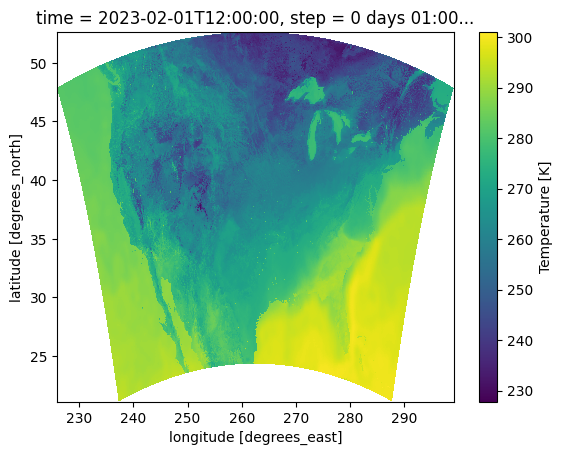

In [6]:
#ds.t.plot()
ds.t.plot(x='longitude', y = "latitude")
plt.scatter(360-86.430867, 39.080319)

In [ ]:
attrs = ds.t.attrs

assert attrs['GRIB_gridType'] == 'lambert'

# Define the CRS with attributes from the temperate DataArray
prj_kwargs = dict(
    globe=ccrs.Globe(ellipse='sphere'),
    central_latitude=attrs['GRIB_LaDInDegrees'],
    central_longitude=attrs['GRIB_LoVInDegrees'],
    standard_parallels=(attrs['GRIB_Latin1InDegrees'],\
                        attrs['GRIB_Latin2InDegrees'])
)

prj = ccrs.LambertConformal(**prj_kwargs)

In [ ]:
#x, y = prj.transform_point(-74.115974, 40.498093,  src_crs= ccrs.PlateCarree()) ###coordinates somewhere near new york

x, y = prj.transform_point(-86.430867, 39.080319, ccrs.PlateCarree()) #first coordinates from metadata
print(x,y)



In [ ]:
plt_kwargs = dict(x='longitude', y='latitude', cmap=cmocean.cm.thermal, 
                  transform=ccrs.PlateCarree())

n_prj = ccrs.PlateCarree()
a, b = n_prj.transform_points(21.138123000000018, 237.28047200000003, prj_kwargs)
print(a,b)
n_prj.tra

In [ ]:
# Ignore some matplotlib deprecation warnings
import warnings; warnings.simplefilter("ignore")

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=prj)
plt_kwargs = dict(x='longitude', y='latitude', cmap=cmocean.cm.thermal, 
                  transform=ccrs.PlateCarree())

plot_temp = ds.t.plot(**plt_kwargs, ax=ax)
#plot_temp = ds.t.plot(ax=ax)

ax.coastlines(linewidth=0.5)
plt.scatter(x = x, y= y)# plots the one coordinate :)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
plt.show()

In [ ]:
# Ignore some matplotlib deprecation warnings
import warnings; warnings.simplefilter("ignore")

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=prj)
#plt_kwargs = dict(x='longitude', y='latitude', cmap=cmocean.cm.thermal, 
#                  transform=ccrs.PlateCarree())

plot_temp = ds.t.plot(x='longitude', y='latitude', cmap=cmocean.cm.thermal, 
                     transform=ccrs.PlateCarree(), ax=ax)

ax.coastlines(linewidth=0.5)
plt.scatter(x = x, y= y)# plots the one coordinate :)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
plt.show()
